# Frequency separation ratio kernels

[Earl Patrick Bellinger](https://earlbellinger.com)$^1$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import integrate
from scipy import interpolate
from scipy.interpolate import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import re
import tomso.gyre as gyre
import tomso.fgong as fgong

from uncertainties import ufloat, unumpy

import tomso

from tqdm import tqdm_notebook as tqdm

In [2]:
from ratios import *

In [3]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('thinfig')

In [4]:
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [8]:
freqs = pd.read_table('Sun-freqs.dat', sep='\s+')

r02s  = r02(freqs)
perturb_r02 = get_ratios(r02, freqs, n_perturb=1000, seed=0, progress=True)
std_r02s = np.std(perturb_r02, axis=0)

r13s  = r13(freqs)
perturb_r13 = get_ratios(r13, freqs, n_perturb=1000, seed=0, progress=True)
std_r13s = np.std(perturb_r13, axis=0)

r10s  = r10(freqs)
perturb_r10 = get_ratios(r10, freqs, n_perturb=1000, seed=0, progress=True)
std_r10s = np.std(perturb_r10, axis=0)


100%|██████████| 1000/1000 [00:24<00:00, 41.51it/s]

 52%|█████▏    | 516/1000 [00:10<00:10, 48.28it/s]


100%|██████████| 1000/1000 [00:20<00:00, 47.93it/s][A

 62%|██████▏   | 618/1000 [00:21<00:13, 27.49it/s]


100%|██████████| 1000/1000 [00:35<00:00, 28.39it/s][A


In [7]:
mod_freqs = pd.read_table('kernels/dif-freqs.dat', sep='\s+')
mod_r02s = r02(mod_freqs)
mod_r13s = r13(mod_freqs)
mod_r10s = r10(mod_freqs)

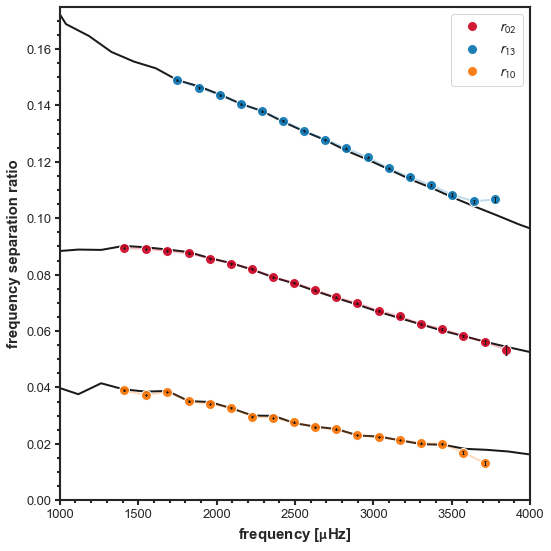

In [14]:
plt.figure(figsize=(8,8))

for idx, r, mod, obs, std, col in [
    (1, r'$r_{02}$', mod_r02s, r02s, std_r02s, red),
    (2, r'$r_{13}$', mod_r13s, r13s, std_r13s, blue),
    (3, r'$r_{10}$', mod_r10s, r10s, std_r10s, orange)]:
    
    plt.plot(mod['freqs'], mod['ratios'], 'k-', lw=2)
    
    plt.plot(obs['freqs'], obs['ratios'], '-', c=col, alpha=0.25)
    plt.plot(obs['freqs'], obs['ratios'], '.', ms=20, 
         markerfacecolor=mpl.colors.to_rgba(col, 0.9),
         markeredgecolor='white', label=r)
    plt.errorbar(obs['freqs'], obs['ratios'], yerr=std, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1)
    plt.legend()

plt.ylim([0, 0.175])
plt.xlim([1000, 4000])
plt.ylabel(r'frequency separation ratio')
plt.xlabel(r'frequency [$\mathbf{\mu}$Hz]')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,8))

for idx, r, mod, obs, std, col in [
    (1, r'$r_{02}$', mod_r02s, r02s, std_r02s, red),
    (2, r'$r_{13}$', mod_r13s, r13s, std_r13s, blue),
    (3, r'$r_{10}$', mod_r10s, r10s, std_r10s, orange)]:
    
    plt.plot(mod['freqs'], mod['ratios'], 'k-', lw=2)
    
    plt.plot(obs['freqs'], obs['ratios'], '-', c=col, alpha=0.25)
    plt.plot(obs['freqs'], obs['ratios'], '.', ms=20, 
         markerfacecolor=mpl.colors.to_rgba(col, 0.9),
         markeredgecolor='white', label=r)
    plt.errorbar(obs['freqs'], obs['ratios'], yerr=std, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1)
    plt.legend()

plt.ylim([0, 0.175])
plt.xlim([1000, 4000])
plt.ylabel(r'frequency separation ratio')
plt.xlabel(r'frequency [$\mathbf{\mu}$Hz]')

plt.tight_layout()
plt.show()

In [15]:
Kc2r = pd.read_table('kernels/K_c2-rho.dat')
Kc2r = pd.read_table('kernels/K_rho-c2.dat')

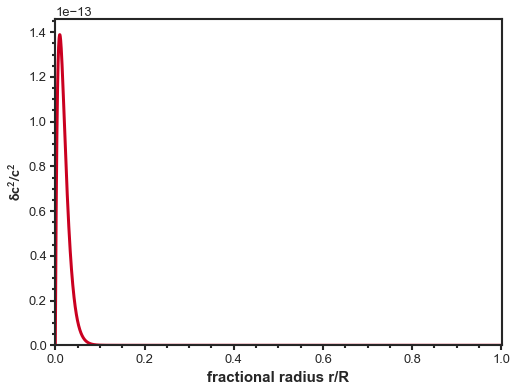

In [18]:
xs = Kc2r.x.values
def plot_gauss(a=1, x0=0.01, delta=0.1):
    plt.figure(figsize=(8,6))
    mg = a*xs*np.exp(-(((xs-x0)/delta) + delta/(2*x0))**2)
    plt.plot(xs, mg, '-', c=red, lw=3)
    plt.xlim([0, np.max(xs)])
    plt.ylim([0, np.max(mg)*1.05])
    plt.xlabel(r'fractional radius r/R')
    plt.ylabel(r'$\mathbf{\delta c^2/c^2}$')
    plt.show()

plot_gauss()

In [28]:
mod_freqs

,l,n,nu,E
0,0,1,258.0222,4.837370e-04
1,0,2,404.4866,1.005330e-04
2,0,3,535.9434,2.490130e-05
3,0,4,680.5713,7.504190e-06
4,0,5,825.3620,2.595590e-06
...,...,...,...,...
133,3,29,4326.8075,6.081480e-10
134,3,30,4465.2629,6.332390e-10
135,3,31,4603.7125,6.634660e-10
136,3,32,4741.9969,7.064940e-10


In [29]:
freqs = np.linspace(1300, 3950, 1000)

In [49]:
gong = fgong.load_fgong('kernels/dif.fgong')

In [50]:
bcz = np.min(gong.x[np.where(gong.N2<0)])
bcz

0.7128267057735123

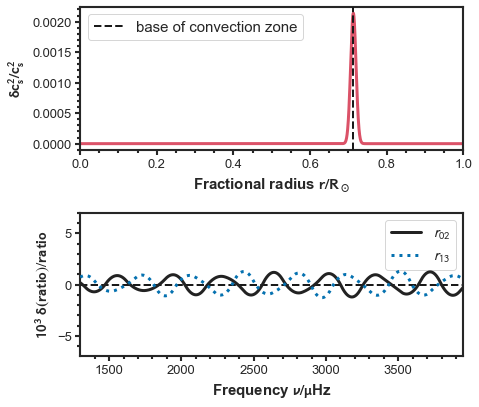

In [139]:
a = 0.003
x0 = bcz
delta = 0.01
mg = a*xs*np.exp(-(((xs-x0)/delta) + delta/(2*x0))**2)

dfreqs = mod_freqs.copy()
for idx, mode in dfreqs.iterrows():
    iden = 'l.' + str(int(mode.l)) + '_n.' + str(int(mode.n))
    if iden not in Kc2r:
        dfreqs = dfreqs.drop(idx)
    dnu = integrate.simpson(Kc2r[iden].values*mg, xs)
    
    dfreqs.loc[idx, 'nu'] = (dnu+1) * mode.nu

dr02s = r02(dfreqs)
dr13s = r13(dfreqs)

SSM    = interp1d(mod_r02s['freqs'], mod_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
interp = interp1d(dr02s['freqs'], dr02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

SSM2    = interp1d(mod_r13s['freqs'], mod_r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)
interp2 = interp1d(dr13s['freqs'], dr13s['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.figure(figsize=(7,6))

plt.subplot(211)
#plt.axhline(0, ls='--', c='k', zorder=-10)
plt.axvline(bcz, ls='--', c='k', zorder=10, label='base of convection zone')
plt.plot(xs, mg, lw=3, c=red, alpha=0.68)
plt.xlabel(r'Fractional radius $\mathbf{r/R_\odot}$')
plt.ylabel(r'$\mathbf{\delta c^2_s/c^2_s}$')
plt.xlim([0, 1])
plt.legend()

plt.subplot(212)

plt.axhline(0, c='k', ls='--', zorder=-10)
plt.plot(freqs, 10**3*(interp -SSM) /SSM,  c='#222222',  lw=3,          label=r'$r_{02}$', zorder=10)
plt.plot(freqs, 10**3*(interp2-SSM2)/SSM2, c=blue, lw=3, ls=':', label=r'$r_{13}$', zorder=100)
plt.ylabel(r'$\mathbf{10^3~\delta (\rm{\mathbf{ratio}})/\rm{\mathbf{ratio}}}$')
plt.xlabel(r'Frequency $\mathbf{\nu/\mu}$Hz')
plt.legend()
plt.ylim([-7, 7])
plt.xlim([np.min(freqs), np.max(freqs)])

plt.tight_layout()
plt.savefig('bcz.pdf', bbox_inches='tight')
plt.show()

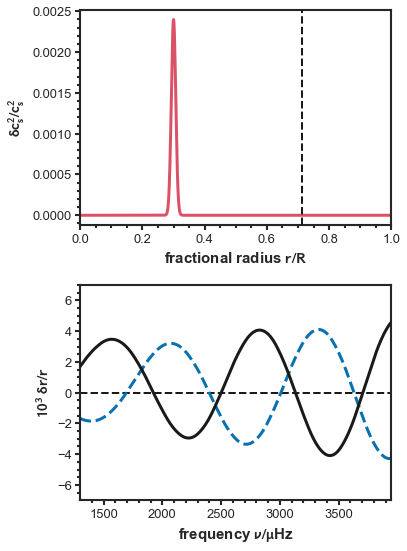

In [117]:
a = 0.008
x0 = 0.3
delta = 0.01
mg = a*xs*np.exp(-(((xs-x0)/delta) + delta/(2*x0))**2)

dfreqs = mod_freqs.copy()
for idx, mode in dfreqs.iterrows():
    iden = 'l.' + str(int(mode.l)) + '_n.' + str(int(mode.n))
    if iden not in Kc2r:
        dfreqs = dfreqs.drop(idx)
    dnu = integrate.simpson(Kc2r[iden].values*mg, xs)
    
    dfreqs.loc[idx, 'nu'] = (dnu+1) * mode.nu

dr02s = r02(dfreqs)
dr13s = r13(dfreqs)

SSM    = interp1d(mod_r02s['freqs'], mod_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
interp = interp1d(dr02s['freqs'], dr02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

SSM2    = interp1d(mod_r13s['freqs'], mod_r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)
interp2 = interp1d(dr13s['freqs'], dr13s['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.figure(figsize=(6,8))

plt.subplot(211)
#plt.axhline(0, ls='--', c='k', zorder=-10)
plt.axvline(bcz, ls='--', c='k', zorder=10, label='convection zone base')
plt.plot(xs, mg, lw=3, c=red, alpha=0.68)
plt.xlabel(r'fractional radius $\mathbf{r/R}$')
plt.ylabel(r'$\mathbf{\delta c^2_s/c^2_s}$')
plt.xlim([0, 1])
#plt.legend()

plt.subplot(212)

plt.axhline(0, c='k', ls='--', zorder=-10)
plt.plot(freqs, 10**3*(interp -SSM) /SSM,  c='k',  lw=3,          label=r'$\mathbf{r_{02}}$', zorder=10)
plt.plot(freqs, 10**3*(interp2-SSM2)/SSM2, c=blue, lw=3, ls='--', label=r'$\mathbf{r_{13}}$')
plt.ylabel(r'$\mathbf{10^3~\delta r/r}$')
plt.xlabel(r'frequency $\mathbf{\nu/\mu}$Hz')
#plt.legend()
plt.ylim([-7, 7])
plt.xlim([np.min(freqs), np.max(freqs)])

plt.tight_layout()
plt.show()